In [1]:
from keras.models import Sequential,Model
from keras.layers import Activation
from keras.layers.core import Dense,Flatten,Dropout
from keras.metrics import categorical_crossentropy
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam, RMSprop , SGD
import keras 
import keras.backend as B
import numpy as np
import keras.applications as A
import matplotlib.pyplot as plt
%matplotlib inline

import os
from keras import regularizers

Using TensorFlow backend.


In [2]:
os.listdir("../input/dataset2-master")

['dataset2-master']

In [3]:
cd "../input/dataset2-master/dataset2-master/"

/kaggle/input/dataset2-master/dataset2-master


In [4]:
train_path = "images/TRAIN"
test_path = "images/TEST"

In [5]:
inputs = (240,320,3)

In [6]:
# train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224),classes=['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL'],batch_size=50)
# test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224),classes=['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL'],batch_size=50)

In [7]:
vgg = A.vgg16.VGG16(weights='imagenet',include_top=False, input_shape=inputs)
#vgg.summary()

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 2s 0us/step


In [8]:
model = Sequential()
for layer in vgg.layers[:-4]:
  layer.trainable=False

In [9]:
for layer in vgg.layers:
  print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f69d8bbcdd8> False
<keras.layers.convolutional.Conv2D object at 0x7f6a62a21860> False
<keras.layers.convolutional.Conv2D object at 0x7f69d8bbc5c0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f69d852e550> False
<keras.layers.convolutional.Conv2D object at 0x7f69d852e6a0> False
<keras.layers.convolutional.Conv2D object at 0x7f69d7ce9470> False
<keras.layers.pooling.MaxPooling2D object at 0x7f69d7c7eb38> False
<keras.layers.convolutional.Conv2D object at 0x7f69d7c7e6a0> False
<keras.layers.convolutional.Conv2D object at 0x7f69d7c2e358> False
<keras.layers.convolutional.Conv2D object at 0x7f69d7c49da0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f69d7bf7630> False
<keras.layers.convolutional.Conv2D object at 0x7f69d7bf7518> False
<keras.layers.convolutional.Conv2D object at 0x7f69d7c2c2e8> False
<keras.layers.convolutional.Conv2D object at 0x7f69d7bc3908> False
<keras.layers.pooling.MaxPooling2D object at 0x7f69d7bdf400>

In [10]:
# Add the vgg convolutional base model
model.add(vgg)
 
# Add new layers
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32, activation='relu' ))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu' ))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu' ))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(4, activation='softmax'))
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 10, 512)        14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 35840)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 35840)             143360    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1146912   
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
___________________________

In [11]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest', validation_split=0.25)


validation_datagen = ImageDataGenerator(rescale=1./255 )
 
# Change the batchsize according to your system RAM
train_batchsize = 20
val_batchsize = 20

In [12]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(240, 320),
        batch_size=train_batchsize,
        class_mode='categorical', subset = "training")
 
validation_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(240, 320),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False,
    subset='validation')

Found 7470 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['acc'])

In [17]:
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples//train_generator.batch_size ,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples//validation_generator.batch_size,
      verbose=1)

Epoch 1/50
373/373 [==============================] - 187s 501ms/step - loss: 1.2517 - acc: 0.4170 - val_loss: 1.0854 - val_acc: 0.4913
Epoch 2/50
373/373 [==============================] - 184s 492ms/step - loss: 1.1256 - acc: 0.4874 - val_loss: 1.0665 - val_acc: 0.5087
Epoch 3/50
373/373 [==============================] - 183s 491ms/step - loss: 1.0230 - acc: 0.5566 - val_loss: 1.0066 - val_acc: 0.5505
Epoch 4/50
373/373 [==============================] - 183s 491ms/step - loss: 0.9153 - acc: 0.6424 - val_loss: 1.0578 - val_acc: 0.4698
Epoch 5/50
373/373 [==============================] - 183s 491ms/step - loss: 0.8166 - acc: 0.7063 - val_loss: 0.6240 - val_acc: 0.8735
Epoch 6/50
373/373 [==============================] - 182s 489ms/step - loss: 0.7448 - acc: 0.7641 - val_loss: 0.4839 - val_acc: 0.9437
Epoch 7/50
373/373 [==============================] - 183s 489ms/step - loss: 0.6495 - acc: 0.8118 - val_loss: 0.4899 - val_acc: 0.8829
Epoch 8/50
373/373 [============================

In [18]:
model.save("/kaggle/working/model_3.h5")

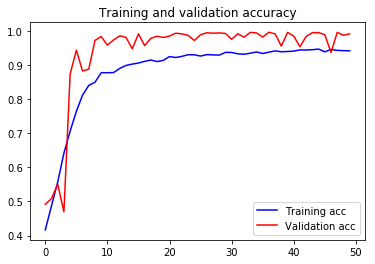

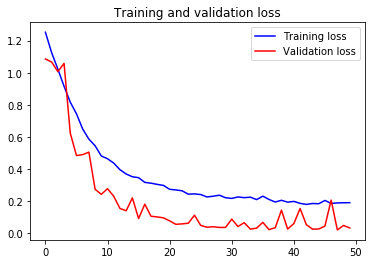

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [20]:
print("The best Training accuracy {}".format(max(acc)*100))
print("The best validation accuracy {} ".format(max(val_acc)*100))

The best Training accuracy 94.6979858571251
The best validation accuracy 99.63518434755706 


In [22]:
from keras.preprocessing import image


In [35]:
img=image.load_img('../input/blood-cells/dataset-master/dataset-master/JPEGImages/BloodImage_00000.jpg',target_size=(240,320))

FileNotFoundError: [Errno 2] No such file or directory: '../input/blood-cells/dataset-master/dataset-master/JPEGImages/BloodImage_00000.jpg'

In [ ]:
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
classes=model.predict(x)

code from https://www.kaggle.com/code/arpitjain007/vgg16-classification-v2